In [4]:
from keras.datasets import imdb
import numpy as np

The argument num_words=10000 means you’ll only keep the top 10,000 most fre-
quently occurring words in the training data. Rare words will be discarded. This allows

you to work with vector data of manageable size.

In [5]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
train_data[0]

17464789/17464789 [==============================] - 0s 0us/step


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

The variables train_data and test_data are lists of reviews; each review is a list of
word indices (encoding a sequence of words). train_labels and test_labels are
lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:

In [7]:
max(max(i) for i in train_data )
# Because you’re restricting yourself to the top 10,000 most frequent words, no word
# index will exceed 10,000

9999

The expression **`max(max(i) for i in train_data)`** is a Python one-liner that calculates the maximum value among all the maximum values in each sublist of **`train_data`**. Here, **`train_data`** is assumed to be a list of lists, where each sublist represents a set of data points.

Let's break it down step-by-step:

**`max(i)`** computes the maximum value within each sublist i of **`train_data`**.
The generator expression **`(max(i)`** for i in **`train_data`**) iterates over each sublist in **`train_data`**, applying the max() function to each one, and generates a sequence of maximum values.
Finally, max() is applied to the sequence of maximum values, yielding the overall maximum value among all sublists in **`train_data`**.

In [8]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

1641221/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

word_index = imdb.get_word_index(): Retrieves the word index dictionary from the IMDB dataset. Keys are word strings, and values are their corresponding integer indices keras.io.

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]): Creates a new dictionary called reverse_word_index by reversing the key-value pairs in the original word_index. The new dictionary has integer indices as keys and word strings as values.

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]]): Decodes the first movie review in train_data by performing the following steps:

Iterate through each integer i in the first review of train_data.
Subtract 3 from the integer value (i - 3). This is because the first 3 indices in the word index are reserved for special characters ("<PAD>", "<START>", and "<UNK>") stackoverflow.com.
Use the get() method to look up the word corresponding to the modified integer value in reverse_word_index. If the index is not found, use the default character '?'.

Join the words together using a space separator (' '.join()), resulting in a human-readable string for the decoded review.

The resulting decoded_review is a string containing the original text of the first movie review in the train_data. This code snippet is useful for understanding the content of the reviews and verifying the correctness of the preprocessing steps applied to the data.

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train, x_test

(array([[0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        ...,
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.]]),
 array([[0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        ...,
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.]]))

In [10]:
len(x_train), len(x_test), len(test_labels), len(train_labels)

(25000, 25000, 25000, 25000)

The provided code defines a function vectorize_sequences that one-hot encodes a list of sequences of integers and then applies this function to both train_data and test_data.

Here's a step-by-step explanation of the code:

Define the vectorize_sequences function with two arguments: sequences, which is a list of sequences of integers, and dimension, which is the size of the one-hot encoded vectors (default is 10,000).

Inside the function, create an empty array results with the shape (len(sequences), dimension), filled with zeros. Each row in results will represent a one-hot encoded sequence.

Iterate through the sequences using enumeration to get both the index i and the sequence. For each sequence, set the corresponding positions in the results array to 1, based on the integer values in the sequence.

Return the results array containing the one-hot encoded sequences.

Apply the vectorize_sequences function to both train_data and test_data to obtain one-hot encoded versions of the input data, named x_train and x_test.

Based on the context provided, I'll give a practical example of one-hot encoding using the vectorize_sequences function from the previous answer.

Suppose you have the following input sequences, which represent the indices of words in a sample text:



```
input_sequences = [
    [1, 3, 5],
    [2, 4, 6, 8],
    [7, 9, 3]
]

```

Using the vectorize_sequences function, you can one-hot encode these sequences:

`encoded_sequences = vectorize_sequences(input_sequences, dimension=10)`

Now, encoded_sequences will contain one-hot encoded vectors:

```[
    [
        [0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 1, 0, 1, 0],
        [0, 0, 0, 1, 0, 0, 0, 1, 0, 1]
    ]
]
```

Here's a visual representation of the one-hot encoding:



```
 Input Sequences:   Encoded Sequences:

1 3 5              0 1 0 1 0 1 0 0 0 0
2 4 6 8            0 0 1 0 1 0 1 0 1 0
7 9 3              0 0 0 1 0 0 0 1 0 1

```

In the encoded sequences, each row represents a sequence from the input data, and each column represents the presence (1) or absence (0) of a word at that index. For example, the first sequence [1, 3, 5] is encoded as [0, 1, 0, 1, 0, 1, 0, 0, 0, 0], where the 1s are placed at indices 1, 3, and 5.





In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

Here's a breakdown of what each part of the code does:

np.asarray(): Converts the input train_labels and test_labels to NumPy arrays if they are not already arrays. This is useful for ensuring that the data is in the correct format for processing with NumPy functions and Keras models. numpy.org

.astype('float32'): Casts the data type of the NumPy arrays to float32. Neural networks usually work with floating-point numbers, and using float32 can help save memory and computational resources compared to the default float64 data type.

After executing this code, y_train and y_test will be NumPy arrays containing the converted training and test labels, respectively. These arrays can then be used as target labels when training and evaluating a neural network model.

The input data is vectors, and the labels are scalars (1s and 0s): this is the easiest setup
you’ll ever encounter. A type of network that performs well on such a problem is
a simple stack of fully connected (Dense) layers with relu activations: Dense(16,
activation='relu').

Hidden units in a neural network determine the dimensionality of the representation space, which can be thought of as the "freedom" the network has to learn internal representations.

Having more hidden units (a higher-dimensional representation space) allows the network to learn more complex representations, which can help improve the model's accuracy.

However, increasing the number of hidden units also increases the computational cost of the network and may lead to learning unwanted patterns that improve performance on the training data but not on the test data (overfitting).


In [12]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Optimizer and loss function

crossentropy is usually the best choice when you’re dealing

with models that output probabilities.

In [13]:
model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'])

Validation :

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [15]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

train the model for 20 epochs (20 iterations over all samples in the
x_train and y_train tensors), in mini-batches of 512 samples. At the same time,
you’ll monitor loss and accuracy on the 10,000 samples that you set apart. You do so by
passing the validation data as the validation_data argument.

In [16]:
history = model.fit(partial_x_train,
      partial_y_train,
      epochs=20,
      batch_size=512,
      validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 82ms/step - loss: 0.5202 - accuracy: 0.7705 - val_loss: 0.3855 - val_accuracy: 0.8717
Epoch 2/20
30/30 [==============================] - 1s 45ms/step - loss: 0.3134 - accuracy: 0.8975 - val_loss: 0.3194 - val_accuracy: 0.8797
Epoch 3/20
30/30 [==============================] - 2s 53ms/step - loss: 0.2313 - accuracy: 0.9235 - val_loss: 0.2827 - val_accuracy: 0.8902
Epoch 4/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1841 - accuracy: 0.9387 - val_loss: 0.2822 - val_accuracy: 0.8858
Epoch 5/20
30/30 [==============================] - 2s 66ms/step - loss: 0.1509 - accuracy: 0.9509 - val_loss: 0.2937 - val_accuracy: 0.8844
Epoch 6/20
30/30 [==============================] - 2s 75ms/step - loss: 0.1266 - accuracy: 0.9602 - val_loss: 0.2889 - val_accuracy: 0.8866
Epoch 7/20
30/30 [==============================] - 2s 56ms/step - loss: 0.1088 - accuracy: 0.9667 - val_loss: 0.3024 - val_accuracy: 0.8863
Epoch 8/20
30

In [17]:
history_dict = history.history
history_dict

{'loss': [0.5201658606529236,
  0.31338244676589966,
  0.23126931488513947,
  0.18413382768630981,
  0.15093964338302612,
  0.1265747994184494,
  0.10879643261432648,
  0.09007352590560913,
  0.07561081647872925,
  0.06297298520803452,
  0.05226808786392212,
  0.045060303062200546,
  0.034605175256729126,
  0.030876608565449715,
  0.02392316423356533,
  0.023946821689605713,
  0.018870418891310692,
  0.014532416127622128,
  0.014409800060093403,
  0.006927806418389082],
 'accuracy': [0.7705333232879639,
  0.8974666595458984,
  0.9235333204269409,
  0.9387333393096924,
  0.9508666396141052,
  0.9602000117301941,
  0.9667333364486694,
  0.9746000170707703,
  0.9797999858856201,
  0.9847999811172485,
  0.9878666400909424,
  0.9892666935920715,
  0.9940000176429749,
  0.9945999979972839,
  0.9970666766166687,
  0.9954000115394592,
  0.9970666766166687,
  0.9980000257492065,
  0.9975333213806152,
  0.9998000264167786],
 'val_loss': [0.3855067789554596,
  0.3194286823272705,
  0.282691627740

In [18]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

The dictionary contains four entries: one per metric that was being monitored during
training and during validation. In the following two listing, let’s use Matplotlib to plot
the training and validation loss side by side

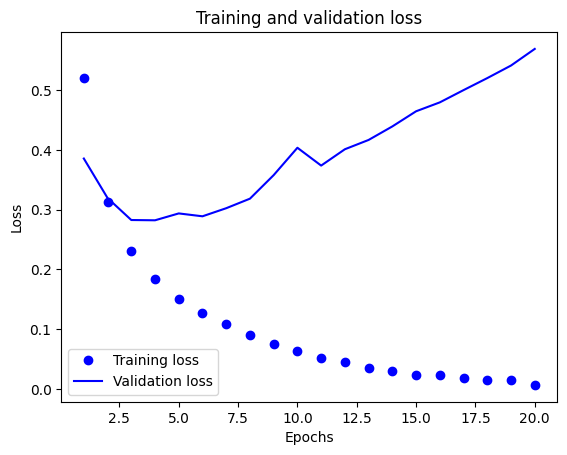

In [19]:
import matplotlib.pyplot as plt
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Plotting the training and validation accuracy

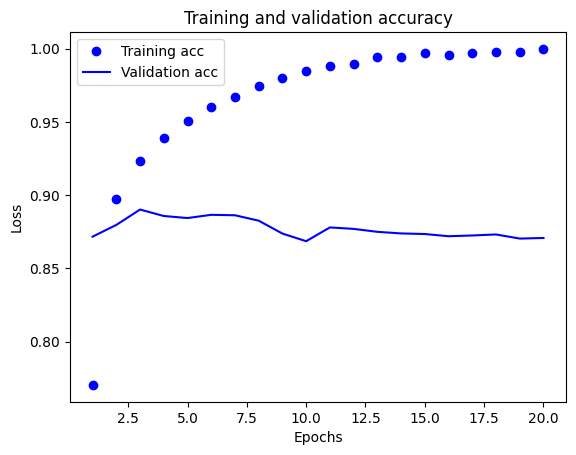

In [20]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

during the training of a neural network, the training loss decreases and the training accuracy increases with each epoch, as expected with gradient descent optimization. However, the validation loss and accuracy do not always follow the same trend, and may peak after a certain point, indicating overfitting. Overfitting occurs when the model learns patterns specific to the training data but fails to generalize to unseen data.

To prevent overfitting, you can stop training early, before the model starts overoptimizing on the training data. There are various techniques to mitigate overfitting, such as early stopping, regularization, and dropout. Early stopping involves monitoring the model's performance on the validation set and stopping the training when the performance starts to degrade. Other techniques like regularization and weight decay penalize model complexity to encourage simpler models that generalize better.

Retraining a model from scratch

In [21]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 41ms/step - loss: 0.4929 - accuracy: 0.8145
Epoch 2/4
49/49 [==============================] - 3s 52ms/step - loss: 0.2967 - accuracy: 0.8941
Epoch 3/4
49/49 [==============================] - 2s 35ms/step - loss: 0.2329 - accuracy: 0.9160
Epoch 4/4
782/782 [==============================] - 4s 5ms/step - loss: 0.2791 - accuracy: 0.8875


In [22]:
results

[0.27912965416908264, 0.8874800205230713]

In [23]:
model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.2369473 ],
       [0.9997196 ],
       [0.8996685 ],
       ...,
       [0.09226181],
       [0.10850436],
       [0.5654733 ]], dtype=float32)